# Linear Regression Multiple Outputs

In [23]:
from torch import nn,optim
import torch
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
# Set the random seed to 1. 

torch.manual_seed(1)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

def Plot_2D_Plane(model, dataset, n=0):
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    w2 = model.state_dict()['linear.weight'].numpy()[0][1]
    b = model.state_dict()['linear.bias'].numpy()

    # Data
    x1 = dataset.x[:, 0].view(-1, 1).numpy()
    x2 = dataset.x[:, 1].view(-1, 1).numpy()
    y = dataset.y.numpy()

    # Make plane
    X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05))
    yhat = w1 * X + w2 * Y + b

    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(x1[:, 0], x2[:, 0], y[:, 0], 'ro', label='y')  # Scatter plot
    ax.plot_surface(X, Y, yhat, alpha=0.5)  # Plane plot

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    plt.title('Estimated Plane, Iteration: ' + str(n))
    ax.legend()

    plt.show()


In [4]:
# Create a 2D dataset

class Data2D(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.zeros(20, 2)
        self.x[:, 0] = torch.arange(-1, 1, 0.1)
        self.x[:, 1] = torch.arange(-1, 1, 0.1)
        self.w = torch.tensor([[1.0], [1.0]])
        self.b = 1
        self.f = torch.mm(self.x, self.w) + self.b    
        self.y = self.f + 0.1 * torch.randn((self.x.shape[0],1))
        self.len = self.x.shape[0]

    # Getter
    def __getitem__(self, index):          
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

#### Create a dataset from the class Data2D

In [ ]:
# Create the dataset object

data_set = Data2D()


#### Create the model, Optimizer, and Total Loss Function (Cost)

In [6]:
class linear_regression(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        yhat = self.linear(x)
        return yhat



In [7]:
model = linear_regression(2,1)
print("The parameters: ", list(model.parameters()))

The parameters:  [Parameter containing:
tensor([[ 0.6209, -0.1178]], requires_grad=True), Parameter containing:
tensor([0.3026], requires_grad=True)]


#### Create the optimizer

In [9]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

#### Create the criterion and total loss of cost

In [18]:
# Create the cost function

criterion = nn.MSELoss()


In [12]:
train_loader = DataLoader(dataset=data_set, batch_size=2)

### Train the Model : Mini-Batch Gradient Descent

Before Training: 


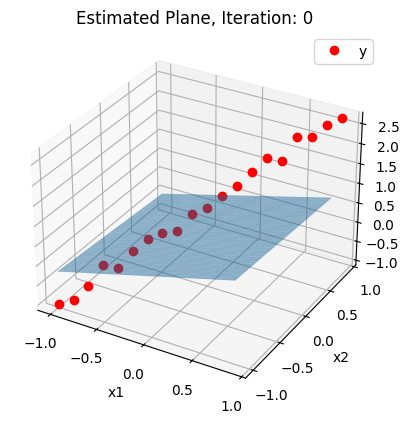

After Training: 


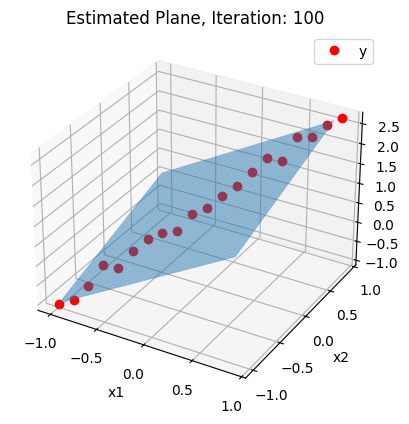

In [25]:
# Train the model

LOSS = []
print("Before Training: ")
Plot_2D_Plane(model, data_set)   
epochs = 100
   
def train_model(epochs):    
    for epoch in range(epochs):
        for x,y in train_loader:
            yhat = model(x)
            loss = criterion(yhat, y)
            LOSS.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()     
train_model(epochs)
print("After Training: ")
Plot_2D_Plane(model, data_set, epochs)  

Text(0, 0.5, 'Cost/total loss ')

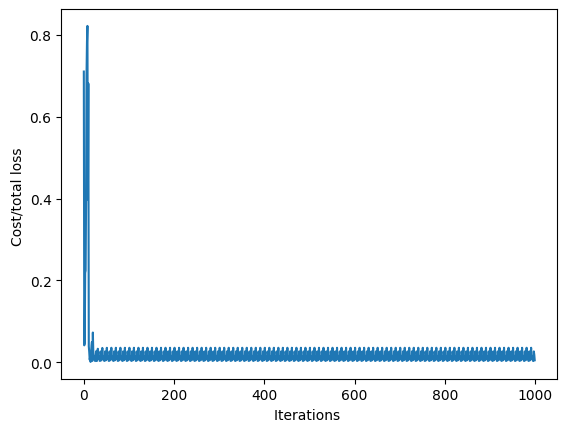

In [26]:
plt.plot(LOSS)
plt.xlabel("Iterations ")
plt.ylabel("Cost/total loss ")

In [30]:
validation_data = Data2D()
Y = validation_data.y
X = validation_data.x

print("total loss or cost for model: ",criterion(model(X),Y))


total loss or cost for model:  tensor(0.0060, grad_fn=<MseLossBackward0>)
